## 4. Gathering and Observing Data       

#### Ali Hüseyin 22/10/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
HousePrice = pd.read_csv('Melbourne_housing_FULL.csv')
# making a copy of the dataset
df=HousePrice.copy()
# Observe the first 5 rows of the dataset
df.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Get the shape of the dataset (rows, columns)
shape = df.shape
print("Shape:", shape)

# Get the number of columns
num_columns = shape[1]
print("Number of Columns:", num_columns)

# Get the size of the dataset (number of cells)
size = df.size
print("Size:", size)


Shape: (34857, 21)
Number of Columns: 21
Size: 731997


In [4]:
# Display dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## 5. Exploratory Data Analysis

In [5]:
# Generate descriptive statistics for numerical columns
statistics = df.describe()

# Display the descriptive statistics
print(statistics)


              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [6]:
# Generate descriptive statistics for all columns
statistics = df.describe(include='all')

# Display the descriptive statistics
print(statistics)


           Suburb       Address         Rooms   Type         Price Method  \
count       34857         34857  34857.000000  34857  2.724700e+04  34857   
unique        351         34009           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq          844             6           NaN  23980           NaN  19744   
mean          NaN           NaN      3.031012    NaN  1.050173e+06    NaN   
std           NaN           NaN      0.969933    NaN  6.414671e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      2.000000    NaN  6.350000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.700000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.295000e+06    NaN   
max           NaN           NaN     16.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Distance      Postcode  ...      Bathroom  

In [7]:
# Identify the columns to be converted to categorical
categorical_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Price']

#Convert the identified columns to categorical data type
#df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [9]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)

# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Verify that duplicates are removed
print("Duplicates Removed. New dataset shape:", df.shape)

Duplicate Rows:
           Suburb        Address  Rooms Type  Price Method SellerG  \
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15858  Eastern Metropolitan        4973.0  

[1 rows x 21 columns]
Duplicates Removed. New dataset shape: (34856, 21)


In [10]:
# Check for and remove duplicate data
duplicates = df.duplicated()  # Find duplicate rows
df.duplicated().sum() # no duplicated rows

0

In [11]:
#Clearing outlier data in the dataset. with z-score

# Calculate the Z-scores for "Landsize" and "Buildingarea" columns
z_scores_landsize = np.abs((df['Landsize'] - df['Landsize'].mean()) / df['Landsize'].std())
z_scores_BuildingArea = np.abs((df['BuildingArea'] - df['BuildingArea'].mean()) / df['BuildingArea'].std())

# Define a threshold for Z-scores to identify outliers (e.g., Z-score > 3 for extreme outliers)
z_score_threshold = 3

# Filter and remove outliers from the dataset
df = df[(z_scores_landsize <= z_score_threshold) & (z_scores_BuildingArea <= z_score_threshold)]

In [12]:
# Define the columns with missing values
columns_with_missing_values = ['Bathroom', 'Car']

# Fill missing values with the mode of each column
for column in columns_with_missing_values:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

# After filling missing values, remove any rows with remaining missing values
df.dropna(inplace=True)

In [13]:
# We can notice the difference in the shape of the data frame
# Get the shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Get the number of columns
print("Number of Columns:", shape[1])

# Get the size of the dataset (number of cells)
print("Size:", df.size)

Shape: (9006, 21)
Number of Columns: 21
Size: 189126


## Data Visualization:

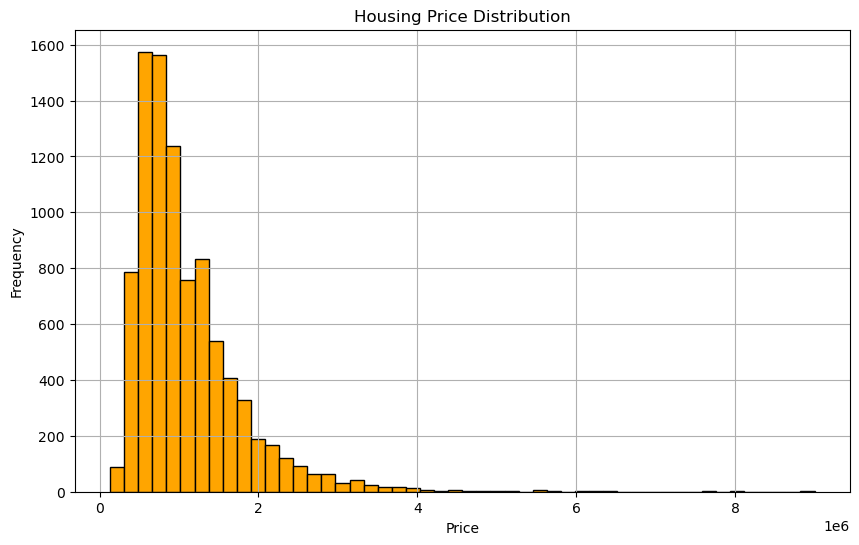

In [14]:


# Create a histogram of housing prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=50, color='orange', edgecolor='black')
plt.title('Housing Price Distribution') # Title
plt.xlabel('Price')                     # x-axis
plt.ylabel('Frequency')                 # y-axis
plt.grid(True)


plt.show()


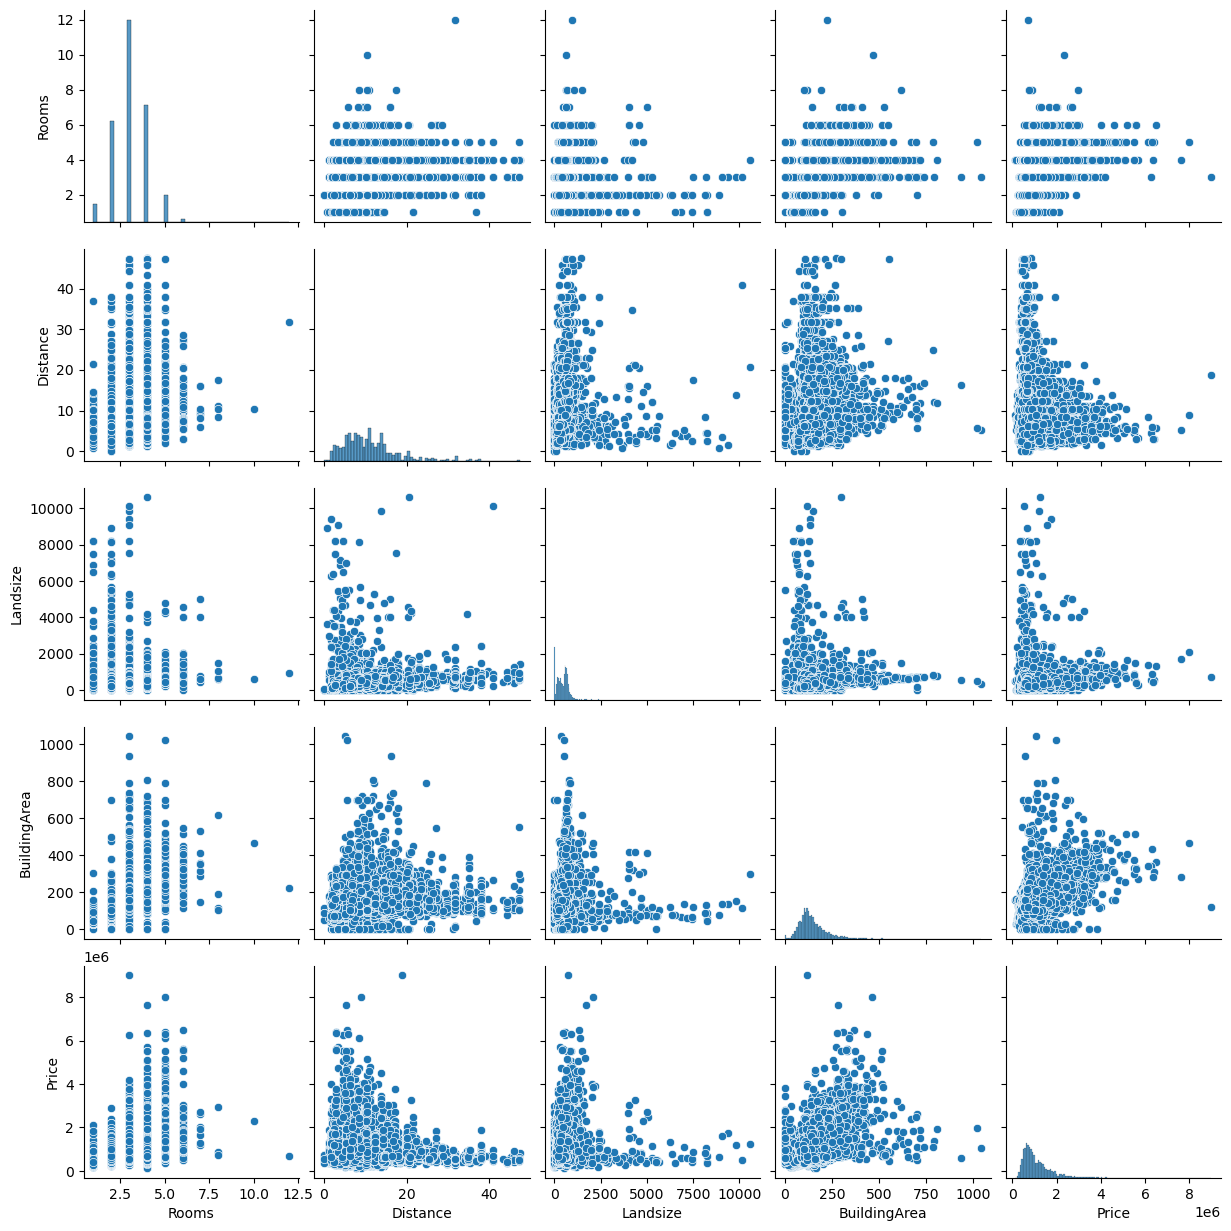

In [15]:
# Select the numerical columns for the pair plot
numerical_columns = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'Price']

# Create a pair plot
sns.pairplot(df[numerical_columns])
plt.show()

C:\Users\Alsein\AppData\Local\Temp\ipykernel_6944\295911953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


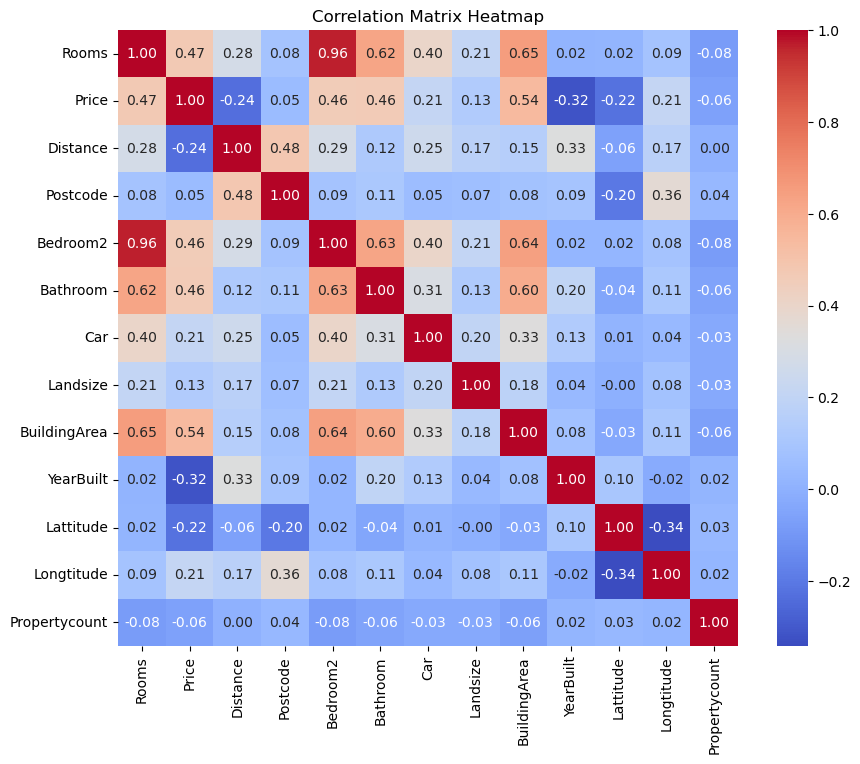

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9006 non-null   object 
 1   Address        9006 non-null   object 
 2   Rooms          9006 non-null   int64  
 3   Type           9006 non-null   object 
 4   Price          9006 non-null   float64
 5   Method         9006 non-null   object 
 6   SellerG        9006 non-null   object 
 7   Date           9006 non-null   object 
 8   Distance       9006 non-null   float64
 9   Postcode       9006 non-null   float64
 10  Bedroom2       9006 non-null   float64
 11  Bathroom       9006 non-null   float64
 12  Car            9006 non-null   float64
 13  Landsize       9006 non-null   float64
 14  BuildingArea   9006 non-null   float64
 15  YearBuilt      9006 non-null   float64
 16  CouncilArea    9006 non-null   object 
 17  Lattitude      9006 non-null   float64
 18  Longtit

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
count=0
# Apply Label Encoding to each column
for column in categorical_columns:
    count+=1
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    print(df[column + '_encoded'])
print("Done")

2          0
4          0
6          0
11         0
14         0
        ... 
34847    309
34849    309
34853    313
34854    313
34856    313
Name: Suburb_encoded, Length: 9006, dtype: int32
2        3974
4        6545
6        7054
11       1390
14       8857
         ... 
34847    4193
34849    5359
34853    4466
34854    1878
34856    4682
Name: Address_encoded, Length: 9006, dtype: int32
2        0
4        0
6        0
11       0
14       0
        ..
34847    0
34849    0
34853    0
34854    1
34856    0
Name: Type_encoded, Length: 9006, dtype: int32
2        1
4        3
6        4
11       1
14       1
        ..
34847    0
34849    3
34853    3
34854    1
34856    0
Name: Method_encoded, Length: 9006, dtype: int32
2         22
4         22
6        147
11       147
14       147
        ... 
34847    183
34849    180
34853    206
34854     98
34856    180
Name: SellerG_encoded, Length: 9006, dtype: int32
2        62
4        63
6        64
11       69
14       74
         ..
3

## 6. Model Selection

In [24]:
x = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

### Example

In [25]:
print("**** Linear Regression ****")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Scala data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelR = LinearRegression().fit(X_train_scaled, y_train)

# Calculate training and testing score 
training_score = modelR.score(X_train_scaled, y_train)
testing_score = modelR.score(X_test_scaled, y_test)

# Print the training and testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

**** Linear Regression ****
Training Score: 1.0
Testing Score: 0.47946376595331974


## Model

In [23]:


# Define the models
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}


In [26]:
model = Lasso(max_iter=10000)  # Increase the max_iter value
model = Lasso(alpha=0.01)  # Adjust alpha based on your dataset
# Train and evaluate each model
for model_name, model_params in models.items():
    model = model_params['model']
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store evaluation results in the models dictionary
    model_params['mae'] = mae
    model_params['mse'] = mse
    model_params['r2'] = r2

# Print the evaluation results for each model
for model_name, model_params in models.items():
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {model_params['mae']:.2f}")
    print(f"Mean Squared Error (MSE): {model_params['mse']:.2f}")
    print(f"R-squared (R2): {model_params['r2']:.2f}")
    print("***************************************************")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+13, tolerance: 3.322e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
Mean Absolute Error (MAE): 223703.93
Mean Squared Error (MSE): 130071520704.06
R-squared (R2): 0.71
***************************************************
Model: LinearRegression
Mean Absolute Error (MAE): 321729.29
Mean Squared Error (MSE): 209410568718.59
R-squared (R2): 0.53
***************************************************
Model: Ridge
Mean Absolute Error (MAE): 228850.01
Mean Squared Error (MSE): 119598479131.42
R-squared (R2): 0.73
***************************************************
Model: ElasticNet
Mean Absolute Error (MAE): 256559.58
Mean Squared Error (MSE): 153434068848.84
R-squared (R2): 0.66
***************************************************
Model: KNeighborsRegressor
Mean Absolute Error (MAE): 384225.74
Mean Squared Error (MSE): 312518793279.75
R-squared (R2): 0.30
***************************************************
Model: RandomForestRegressor
Mean Absolute Error (MAE): 167406.35
Mean Squared Error (MSE): 79104550909.20
R-squared (R2): 0.82
*****************

In [ ]:
#THE OUTPUTS :

#Model: LinearRegression
#Mean Absolute Error (MAE): 263714.17
#Mean Squared Error (MSE): 149194920871.79
#R-squared (R2): 0.67
#***************************************************

#Model: Ridge
#Mean Absolute Error (MAE): 226472.89
#Mean Squared Error (MSE): 122583925401.18
#R-squared (R2): 0.73
#***************************************************

#Model: ElasticNet
#Mean Absolute Error (MAE): 254167.16 
#Mean Squared Error (MSE): 156251724532.69
#R-squared (R2): 0.66
#***************************************************

#Model: KNeighborsRegressor
#Mean Absolute Error (MAE): 385433.84
#Mean Squared Error (MSE): 327597783968.41
#R-squared (R2): 0.28
#***************************************************

#Model: RandomForestRegressor
#Mean Absolute Error (MAE): 163940.81
#Mean Squared Error (MSE): 81426497570.96
#R-squared (R2): 0.82
#***************************************************

#Model: GradientBoostingRegressor
#Mean Absolute Error (MAE): 180774.96
#Mean Squared Error (MSE): 89770173385.87
#R-squared (R2): 0.80
#***************************************************

#Model: AdaBoostRegressor
#Mean Absolute Error (MAE): 345310.66
#Mean Squared Error (MSE): 216041345426.58
#R-squared (R2): 0.53
#**************************************************


## Choice The Best Module : 

To take the choice :
#Lower MAE values indicate better performance.
 
#Lower RMSE values indicate better performance.

#Higher R2 values indicate better performance.

That why Model: KNeighborsRegressor is The best Module 

In [ ]:
#That why Model: KNeighborsRegressor is The best Module 
